### Import Libraries



In [36]:
import nltk
nltk.download("punkt") #This tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences.
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split as ttsplit
from sklearn import svm
import pandas as pd
import pickle
import numpy as np
import chardet
from gensim import parsing
from sklearn.metrics import roc_auc_score, confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.svm import SVC

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Prepare the data

In [37]:
#read the dataset
df = pd.read_csv("emails.csv")
print(df.head()) 

                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1


In [38]:
#show current data shape
df.shape 

(5728, 2)

In [39]:
#remove duplicated dataset 
df.drop_duplicates(inplace = True)

In [40]:
#show the data shape after removing duplication 
df.shape

(5695, 2)

## Without pre-processing 

### Encode the data numerically 

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
message_bow0 = vectorizer.fit_transform(df['text'])

### Split the data 

In [42]:
#split the data into 80% traning and 20% testing 
from sklearn.model_selection import train_test_split
x_train0 , x_test0 , y_train0 , y_test0 = train_test_split(message_bow0, df['spam'], test_size = 0.2, random_state = 0)

### SVM  

In [43]:
classifier0 = svm.SVC()
classifier0.fit(x_train0,y_train0)

SVC()

#### Confusion Matrix for testing

In [44]:
#predict the test set result 
y_pred0 = classifier0.predict(x_test0)

Accuracy: 0.952
Precision: 0.973
Recall: 0.818
F1 Score: 0.889


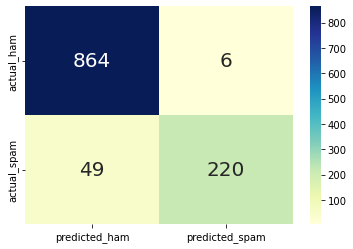

In [45]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cm = confusion_matrix(y_test0, y_pred0)
sns.heatmap(cm, xticklabels=['predicted_ham', 'predicted_spam'], yticklabels=['actual_ham', 'actual_spam'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");
true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]
accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)
print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

#### Confusion matrix for training 

In [46]:
#predict train set result 
y_pred_train0 = classifier0.predict(x_train0)

Accuracy: 0.965
Precision: 0.989
Recall: 0.865
F1 Score: 0.923


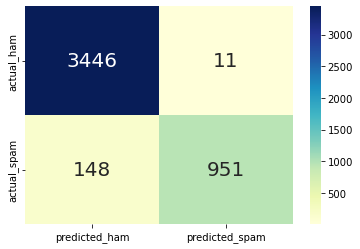

In [47]:
#training confusion matrix 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cm = confusion_matrix(y_train0, y_pred_train0)
sns.heatmap(cm, xticklabels=['predicted_ham', 'predicted_spam'], yticklabels=['actual_ham', 'actual_spam'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");
true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]
accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)
print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

### Predict new text 

In [48]:
#method to predict the text whether is spam or not 
def predict0(text):
    text = text.lower()
    text = parsing.stem_text(text)
    text_vector = vectorizer.transform([text])
    svm_prediction = "Spam" if classifier0.predict(text_vector) == 1 else "Not_spam"
    print("SVM classifier: "+svm_prediction)

In [49]:
predict0("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

SVM classifier: Not_spam


In [50]:
predict0("Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's")

SVM classifier: Not_spam


In [51]:
predict0("Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  marketing break - through shouldn ' t make gaps in your budget . 100 % satisfaction  guaranteed : we provide unlimited amount of changes with no extra fees for you to  be surethat you will love the result of this collaboration . have a look at our  portfolio _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ not interested . . . _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _")

SVM classifier: Spam


In [52]:
predict0("Greetings, my name is Charles W. Jackson Jr, the mega jackpot winner of $344.6 million on June 01, 2019. ")

SVM classifier: Not_spam


## With pre-processing 

### Pre-processing data 

In [53]:
#Remove punctuation, alphanumeric and convert to lower case 
import re
import string
alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
df['text'] = df.text.map(alphanumeric).map(punc_lower)
print(df.head())

                                                text  spam
0  subject  naturally irresistible your corporate...     1
1  subject  the stock trading gunslinger  fanny i...     1
2  subject  unbelievable new homes made easy  im ...     1
3  subject    color printing special  request add...     1
4  subject  do not have money   get software cds ...     1


### Encode the data numerically 

In [54]:
#convert the collection of text into matrix of token 
#remove the stopwords 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
message_bow = vectorizer.fit_transform(df['text'])

### Split the data

In [55]:
#split the data into 80% traning and 20% testing 
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(message_bow, df['spam'], test_size = 0.2, random_state = 0)

### SVM 

In [56]:
classifier = svm.SVC()
classifier.fit(x_train,y_train)

SVC()

#### Confusion matrix for testing 

In [57]:
#predict the test set result 
y_pred = classifier.predict(x_test)


Accuracy: 0.969
Precision: 0.98
Recall: 0.888
F1 Score: 0.932


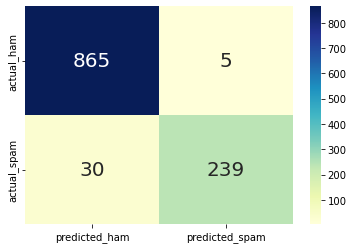

In [58]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=['predicted_ham', 'predicted_spam'], yticklabels=['actual_ham', 'actual_spam'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");
true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]
accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)
print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

#### Confusion matrix for training 

In [59]:
#predict train set result 
y_pred_train = classifier.predict(x_train)

Accuracy: 0.992
Precision: 0.994
Recall: 0.974
F1 Score: 0.984


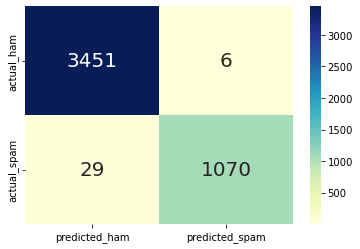

In [60]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, xticklabels=['predicted_ham', 'predicted_spam'], yticklabels=['actual_ham', 'actual_spam'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");
true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]
accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)
print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

### Predict new text 

In [61]:
#method to predict the text whether is spam or not 
def predict(text):
    text = text.lower()
    text = parsing.stem_text(text)
    text_vector = vectorizer.transform([text])
    svm_prediction = "Spam" if classifier.predict(text_vector) == 1 else "Not_spam"
    print("SVM classifier: "+svm_prediction)

In [62]:
predict("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

SVM classifier: Not_spam


In [63]:
predict("Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's")

SVM classifier: Spam


In [64]:
predict("Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  marketing break - through shouldn ' t make gaps in your budget . 100 % satisfaction  guaranteed : we provide unlimited amount of changes with no extra fees for you to  be surethat you will love the result of this collaboration . have a look at our  portfolio _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ not interested . . . _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _")

SVM classifier: Spam


In [65]:
predict("Greetings, my name is Charles W. Jackson Jr, the mega jackpot winner of $344.6 million on June 01, 2019. ")

SVM classifier: Not_spam
